In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_i = [0, 1, 2, 3, 4]
y_i = [1, 3, 3, 4, 2]
x=np.linspace(0,4,1000)

# 编程 3.4-3

In [4]:
def cubic_spline_1(x_i, y_i,x):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1] # hi
    dy = y_i[1:] - y_i[:-1] #f_(i+1)- f_i
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    
# 自然样条
    M[0, 0] = 1
    M[-1, -1] = 1
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    if x_i[0]<=np.min(x) and np.max(x)<=x_i[-1]:
        cond=[]
        for i in range(1,n):
            cond.append(x<=x_i[i])
        choice=[]
        for i in range(n-1):
            choice.append(a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3)
        return np.select(cond,choice)
    else:
        pass

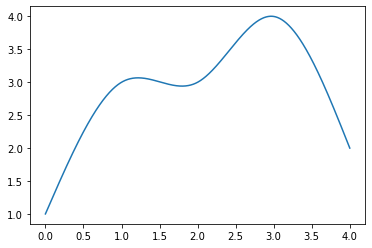

In [5]:
y1=cubic_spline_1(x_i, y_i,x)
plt.plot(x,y1)

# 编程 3.4-4

In [6]:
def cubic_spline_2(x_i, y_i,x):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1] # hi
    dy = y_i[1:] - y_i[:-1] #f_(i+1)- f_i
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    
# 曲率调整
    M[0, 0] = 2
    M[-1, -1] = 2
    N[0] = 3
    N[-1] = 2
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    if x_i[0]<=np.min(x) and np.max(x)<=x_i[-1]:
        cond=[]
        for i in range(1,n):
            cond.append(x<=x_i[i])
        choice=[]
        for i in range(n-1):
            choice.append(a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3)
        return np.select(cond,choice)
    else:
        pass

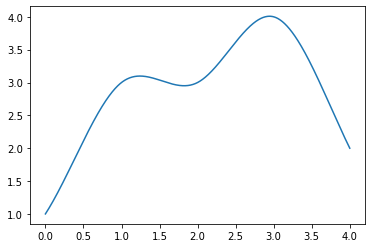

In [7]:
y2=cubic_spline_2(x_i, y_i,x)
plt.plot(x,y2)

# 编程 3.4-5

In [8]:
def cubic_spline_3(x_i, y_i,x):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1] # hi
    dy = y_i[1:] - y_i[:-1] #f_(i+1)- f_i
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    
# 曲率钳制
    M[0, 0] = 2*dx[0]
    M[0, 1] = dx[0]
    M[-1, -1] = 2*dx[-1]
    M[-1, -2] = dx[-1]
    N[0] = 3*(dy[0]/dx[0]-0)
    N[-1] = 3*(1-dy[-1]/dx[-1])
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    if x_i[0]<=np.min(x) and np.max(x)<=x_i[-1]:
        cond=[]
        for i in range(1,n):
            cond.append(x<=x_i[i])
        choice=[]
        for i in range(n-1):
            choice.append(a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3)
        return np.select(cond,choice)
    else:
        pass

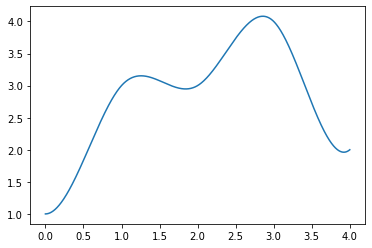

In [9]:
y3=cubic_spline_3(x_i, y_i,x)
plt.plot(x,y3)

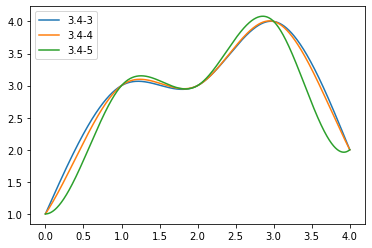

In [10]:
plt.plot(x,y1,label='3.4-3')
plt.plot(x,y2,label='3.4-4')
plt.plot(x,y3,label='3.4-5')
plt.legend()

# 编程 3.5-2

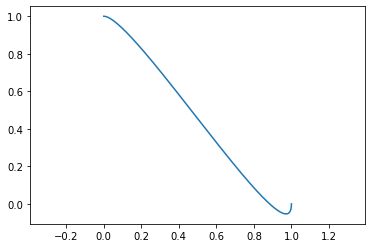

In [11]:
t=np.linspace(0,1,1000)
x=t/2+2*t**2-3/2*t**3
y=1-4*t**2+3*t**3
plt.axis('equal')
plt.plot(x,y)